In [285]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [286]:
raw=pd.read_csv("/Users/mahikajadhav/Downloads/framingham.csv")

In [287]:
raw

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [288]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [148]:
raw.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [149]:
raw.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [155]:
raw.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [156]:
import plotly.express as px


In [289]:
fig = px.imshow(raw.corr().sort_values(by='TenYearCHD'), text_auto=True, title='Heatmap of Correlation')
fig.show()

In [290]:
px.histogram(raw, x='age', color='male',title='Histogram of Age column')



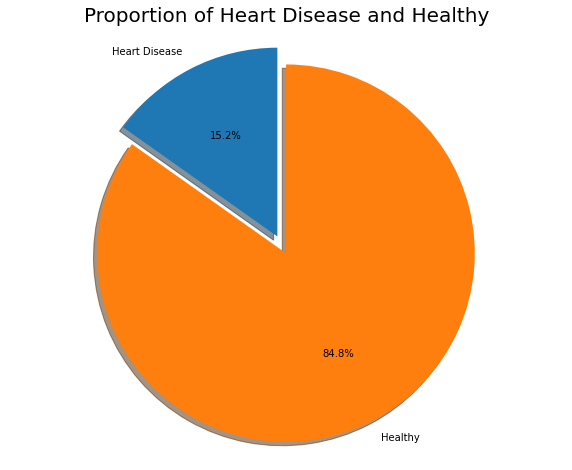

In [303]:
labels = 'Heart Disease', 'Healthy'
sizes = [raw.TenYearCHD[raw["TenYearCHD"]==1].count(), raw.TenYearCHD[raw["TenYearCHD"]==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Heart Disease and Healthy", size = 20)
plt.show()

Text(0.5, 1.0, 'The Counts of Hearth Disease by systolic blood pressure ')

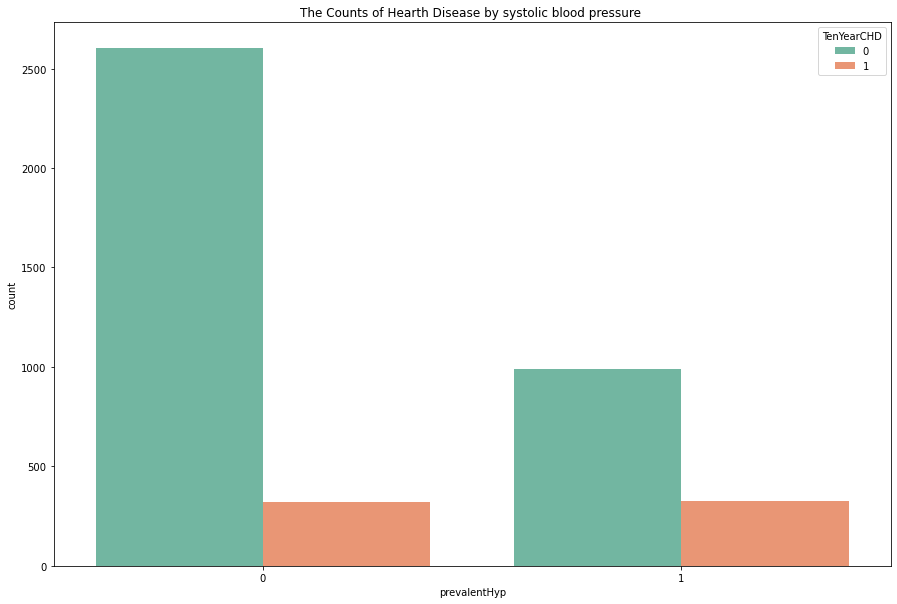

In [304]:
plt.figure(figsize=(15,10))
sns.countplot(x="prevalentHyp", hue="TenYearCHD", data=raw,palette="Set2")
plt.title("The Counts of Hearth Disease by systolic blood pressure ")

In [292]:
fig = px.histogram(raw, x='education', nbins=4)
fig.update_layout(bargap=0.1, title='Histogram of Education Column')
fig.show()

In [306]:
import plotly.graph_objects as go
labels = raw['education'].unique()
values = raw['education'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Education</b>")
fig.show()


Text(0.5, 1.0, 'Distribution of  diastolic blood pressure by Heart Disease')

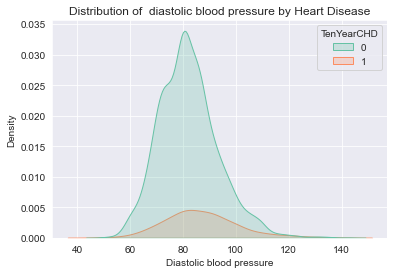

In [307]:
sns.set_style("darkgrid")
sns.kdeplot(x="diaBP",data=raw,palette="Set2",hue="TenYearCHD",shade=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.ylabel('Density');
plt.xlabel('Diastolic blood pressure');
plt.title('Distribution of  diastolic blood pressure by Heart Disease')

Text(0.5, 1.0, 'Distribution of  systolic blood pressure  by Heart Disease')

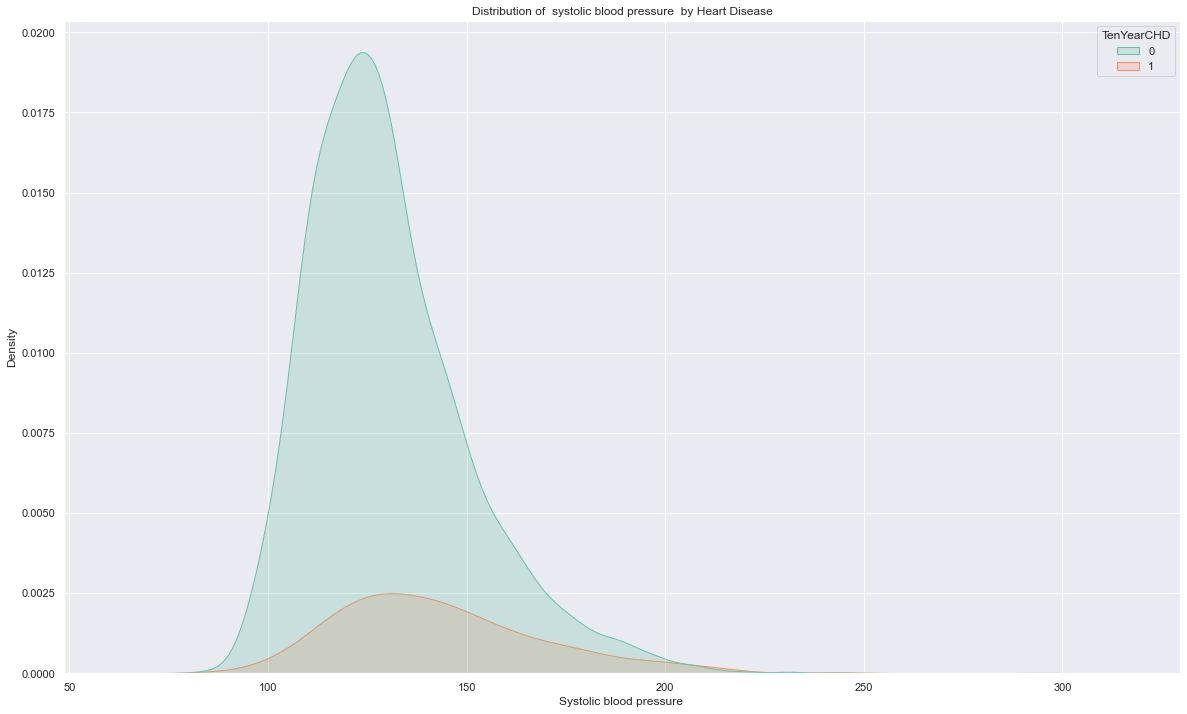

In [308]:
sns.set_style("darkgrid")
sns.kdeplot(x="sysBP",data=raw,palette="Set2",hue="TenYearCHD",shade=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.ylabel('Density');
plt.xlabel('Systolic blood pressure ');
plt.title('Distribution of  systolic blood pressure  by Heart Disease')


In [293]:
px.histogram(raw, 'currentSmoker', color='currentSmoker', nbins=4)


In [294]:
raw['male']

0       1
1       0
2       1
3       0
4       0
       ..
4233    1
4234    1
4235    0
4236    0
4237    0
Name: male, Length: 4238, dtype: int64

In [295]:
raw['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [296]:
raw.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [297]:
numeric_cols = raw.select_dtypes(include=np.number).columns.tolist()


In [298]:
numeric_cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [299]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [300]:
imputer.fit(raw[numeric_cols])

SimpleImputer()

In [301]:
list(imputer.statistics_)

[0.42921189240207647,
 49.58494572911751,
 1.9789499153157513,
 0.49410099103350635,
 9.003088619624615,
 0.02962962962962963,
 0.005899008966493629,
 0.31052383199622463,
 0.025719679093912224,
 236.72158548233045,
 132.35240679565834,
 82.89346389806512,
 25.80200758473572,
 75.87892376681614,
 81.96675324675324,
 0.1519584709768759]

In [178]:
raw[numeric_cols] = imputer.transform(raw[numeric_cols])


In [179]:
raw.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [182]:
scaler.fit(raw[numeric_cols])

MinMaxScaler()

In [183]:
raw[numeric_cols] = scaler.transform(raw[numeric_cols])


In [184]:
raw.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,0.462762,0.326317,0.494101,0.128616,0.02963,0.005899,0.310524,0.025720,0.220240,0.230981,0.369243,0.248716,0.322009,0.118550,0.151958
std,0.495022,0.225583,0.335692,0.500024,0.169703,0.16852,0.076587,0.462763,0.158316,0.075257,0.104199,0.126041,0.098666,0.121466,0.064510,0.359023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.168081,0.158392,0.285714,0.182744,0.242424,0.090395,0.000000
50%,0.000000,0.447368,0.333333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.215620,0.210402,0.359788,0.239215,0.313131,0.112994,0.000000
75%,1.000000,0.631579,0.666667,1.000000,0.285714,0.00000,0.000000,1.000000,0.000000,0.263158,0.286052,0.443122,0.302896,0.393939,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [187]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')


In [246]:
valid_col = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']


In [247]:
target_col = 'TenYearCHD'

In [248]:
model.fit(train_df[valid_col], train_df[target_col])

LogisticRegression(solver='liblinear')

In [249]:
print(model.coef_.tolist())

[[0.3458722835047534, 2.0786994747189453, -0.04431065212423891, -0.07006324326984557, 1.5667512376720354, 0.6368011897447254, 0.7795400046463784, 0.329708361349574, 0.6369411298320059, 0.5785650184888472, 1.8705430833324985, 0.22839382146354925, -0.32622011803901513, -0.3385225833975098, 1.313208234630994]]


In [250]:
print(model.intercept_)


[-3.89099158]


In [251]:
X_train = train_df[valid_col]
X_val = val_df[valid_col]
X_test = test_df[valid_col]
train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [252]:
train_df[target_col]


1489    0.0
1368    0.0
2761    0.0
741     0.0
2418    0.0
       ... 
1962    0.0
2643    0.0
2689    0.0
212     0.0
3369    1.0
Name: TenYearCHD, Length: 2542, dtype: float64

In [253]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.90947884, 0.09052116],
       [0.83834028, 0.16165972],
       [0.95049625, 0.04950375],
       ...,
       [0.94716474, 0.05283526],
       [0.64386573, 0.35613427],
       [0.60685307, 0.39314693]])

In [254]:
model.classes_ 


array([0., 1.])

In [255]:
from sklearn.metrics import accuracy_score
accuracy_score(train_df[target_col], train_preds)

0.8544453186467349

In [256]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_df[target_col], train_preds, normalize='true')


array([[0.997208  , 0.002792  ],
       [0.92620865, 0.07379135]])

In [261]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(12, 10))
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds


Accuracy: 85.44%


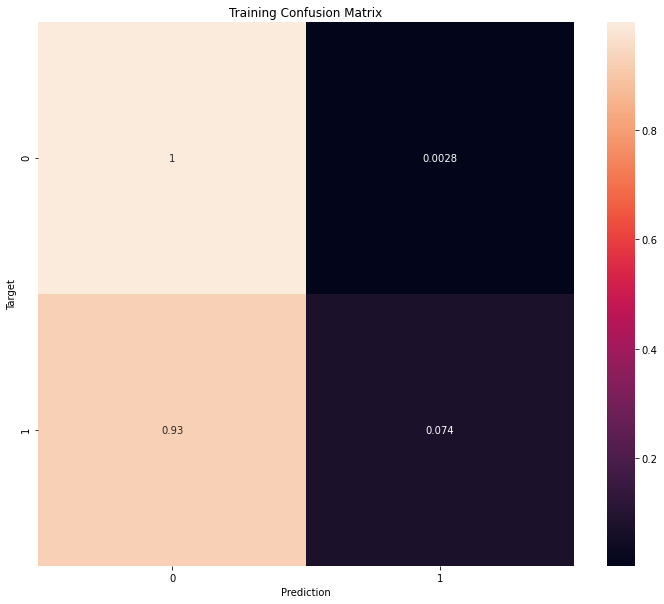

In [262]:
predict_and_plot(X_train, train_df[target_col], 'Training');

In [267]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[17  0]
 [ 3  0]]


PRECISION

In [274]:
PRECISION=1/(1+0.0028)

In [275]:
PRECISION

0.997207818109294

In [276]:
RECALL=1/(1+0.93)

In [277]:
RECALL

0.5181347150259067

In [278]:
F_MEASURE=2*((PRECISION*RECALL)/(PRECISION+RECALL))

In [279]:
F_MEASURE

0.6819421713038734

In [280]:
SENSITIVITY=1/1.0028

In [281]:
SENSITIVITY

0.997207818109294

In [282]:
SPECIFICITY=0.074/(0.0028+0.074)

In [283]:
SPECIFICITY

0.9635416666666667

In [265]:
MISCAL=0

In [266]:
MISCAL

0